<font color=Magenta, size = "4"> Import the required modules and libraries </font>

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn import preprocessing as ppr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn import metrics
%matplotlib inline

<font color=Magenta, size = "3"> Import the data and preprocess </font>

In [3]:
Telecom = pd.read_excel("D:/BACP/Predictive Modelling/Final Project/Cellphone.xlsx")

In [4]:
Telecom.shape
Telecom.dtypes
Telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
Telecom['ContractRenewal'] = Telecom['ContractRenewal'].astype('category')
Telecom['DataPlan'] = Telecom['DataPlan'].astype('category')
#Telecom['CustServCalls'] = Telecom['CustServCalls'].astype('category')

<font color=Magenta, size = "3"> Exploratory Data Analysis (EDA) </font>

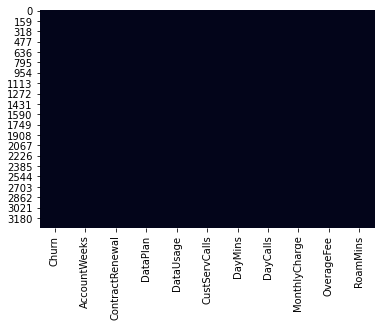

In [84]:
sns.heatmap(Telecom.isnull(),cbar=False)

In [85]:
def plot_cor(df,size=11):
    correl = df.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    ax.matshow(correl)
    plt.xticks(range(len(correl.columns)), correl.columns)
    plt.yticks(range(len(correl.columns)), correl.columns)

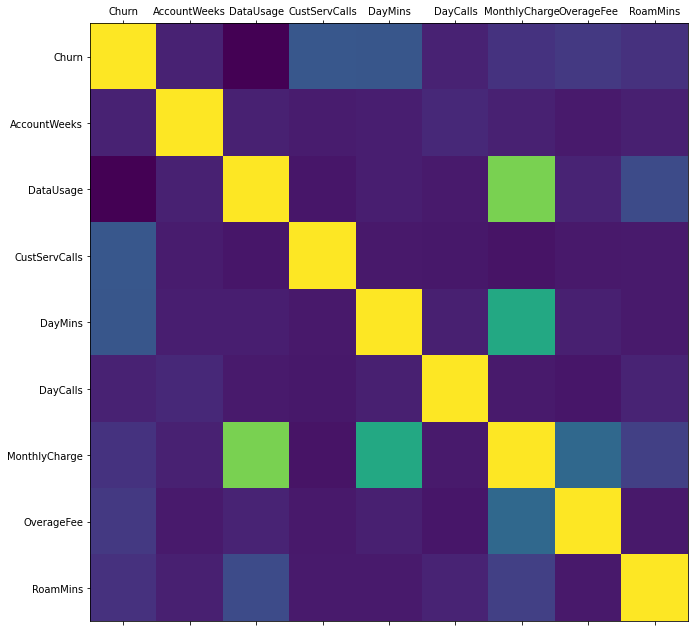

In [11]:
plot_cor(Telecom)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EEEAFAC400>,
      dtype=object)

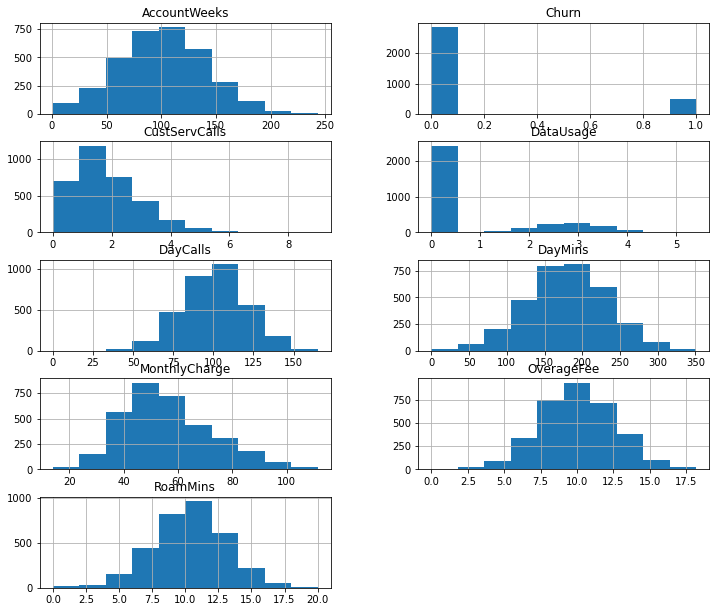

In [9]:
col = list(Telecom)
Telecom[col].hist(stacked=False,figsize=(12,30), layout=(14,2))

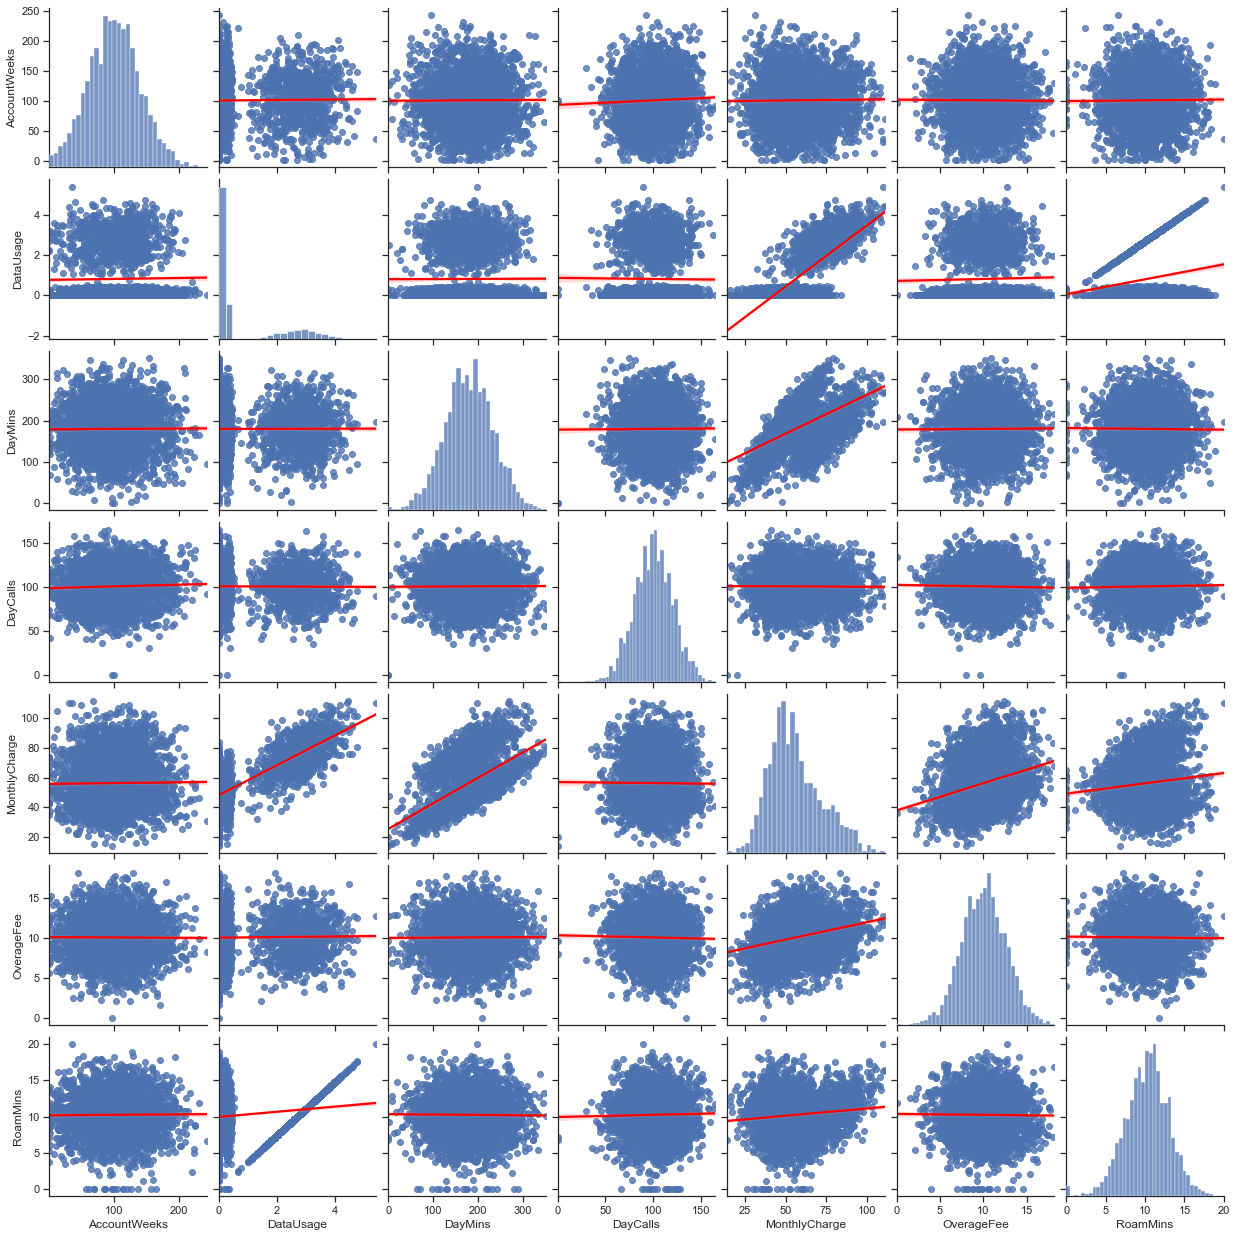

In [25]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=Telecom[['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']],kind="reg", plot_kws={'line_kws':{'color':'red'}})

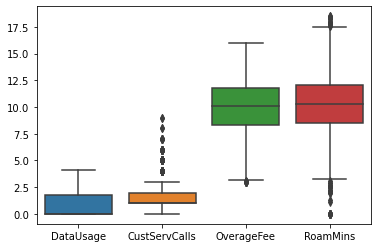

In [87]:
#sns.boxplot(data=Telecom[['AccountWeeks','DayMins','DayCalls','MonthlyCharge']])
sns.boxplot(data=Telecom[['DataUsage','CustServCalls','OverageFee','RoamMins']])

<font color=Magenta, size = "3"> Outlier Treatment </font>

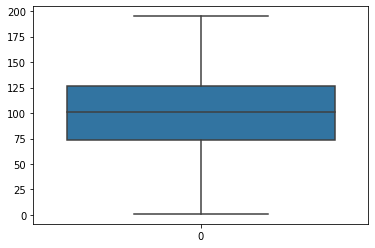

In [6]:
Telecom['AccountWeeks'].quantile([0.01,0.99])
Telecom['AccountWeeks'] = np.where(Telecom['AccountWeeks'] > 195, 195, Telecom['AccountWeeks'])
sns.boxplot(data=Telecom['AccountWeeks'])

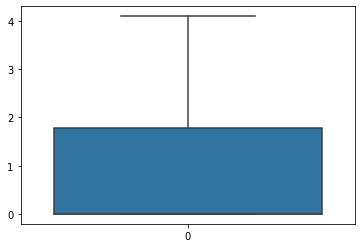

In [7]:
Telecom['DataUsage'].quantile([0.01,0.99])
Telecom['DataUsage'] = np.where(Telecom['DataUsage'] > 4.1, 4.1, Telecom['DataUsage'])
sns.boxplot(data=Telecom['DataUsage'])

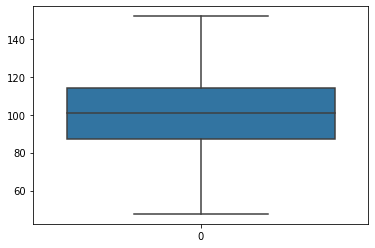

In [8]:
Telecom['DayCalls'].quantile([0.01,0.99])
Telecom['DayCalls'] = np.where(Telecom['DayCalls'] > 152, 152, Telecom['DayCalls'])
Telecom['DayCalls'] = np.where(Telecom['DayCalls'] < 47.66, 47.66, Telecom['DayCalls'])
sns.boxplot(data=Telecom['DayCalls'])

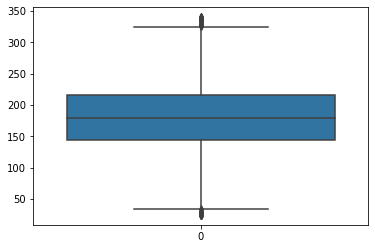

In [9]:
Telecom['DayMins'].quantile([0.01,0.99])
Telecom['DayMins'] = np.where(Telecom['DayMins'] > 340, 340, Telecom['DayMins'])
Telecom['DayMins'] = np.where(Telecom['DayMins'] < 25, 25, Telecom['DayMins'])
sns.boxplot(data=Telecom['DayMins'])

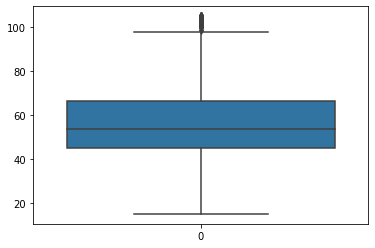

In [10]:
Telecom['MonthlyCharge'].quantile([0.01,0.99])
Telecom['MonthlyCharge'] = np.where(Telecom['MonthlyCharge'] > 105, 105, Telecom['MonthlyCharge'])
Telecom['MonthlyCharge'] = np.where(Telecom['MonthlyCharge'] < 15, 15, Telecom['MonthlyCharge'])
sns.boxplot(data=Telecom['MonthlyCharge'])

In [12]:
Telecom['OverageFee'] = np.where(Telecom['OverageFee'] > 16, 16 ,Telecom['OverageFee'])
Telecom['OverageFee'] = np.where(Telecom['OverageFee'] < 3, 3 ,Telecom['OverageFee'])
Telecom['RoamMins'] = np.where(Telecom['RoamMins'] > 18.5, 18.5 ,Telecom['RoamMins'])

<font color=Magenta, size = "3"> Multicollinearity Check </font>

In [38]:
y, X = dmatrices("Churn ~ AccountWeeks + ContractRenewal + DataPlan + DataUsage + CustServCalls + DayMins + DayCalls + MonthlyCharge + OverageFee + RoamMins ", data = Telecom, return_type='dataframe')

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,86.015276,Intercept
1,1.006829,ContractRenewal[T.1]
2,2.464331,DataPlan[T.1]
3,1.003630,AccountWeeks
4,1.002016,CustServCalls
5,inf,DayMins
6,inf,DayCalls
7,2.688478,MonthlyCharge
8,1.177305,OverageFee
9,1.035043,RoamMins


In [43]:
y, X = dmatrices("Churn ~ AccountWeeks + ContractRenewal + DataPlan + CustServCalls + DayMins + DayCalls + OverageFee + RoamMins ", data = Telecom, return_type='dataframe')

In [44]:
# Performing again after removing monthly Charge and Data Usage
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,79.096289,Intercept
1,1.003764,ContractRenewal[T.1]
2,1.000733,DataPlan[T.1]
3,1.003133,AccountWeeks
4,1.001800,CustServCalls
5,inf,DayMins
6,inf,DayCalls
7,1.001169,OverageFee
8,1.002360,RoamMins


<font color=Magenta, size = "3"> Split the data to training and testing set </font>

In [69]:
X = Telecom.drop(['Churn','MonthlyCharge','DataUsage'],axis=1)
Y = Telecom['Churn']

In [70]:
X_Train , x_test , Y_Train , y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [71]:
print("{0:0.2f}% data is in training set" .format((len(X_Train)/len(Telecom.index))*100))
print("{0:0.2f}% data is in test set" .format((len(x_test)/len(Telecom.index))*100))

70.00% data is in training set
30.00% data is in test set


<font color=Magenta, size = "3"> Logistic Regression </font>

In [20]:
Xindept = Telecom[['AccountWeeks','ContractRenewal','DataPlan','CustServCalls','DayMins','DayCalls','OverageFee','RoamMins']]
Ydepnt = Telecom[['Churn']]
logitmodel = sm.Logit(Ydepnt,Xindept.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.348957
         Iterations 7


In [57]:
logitmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.157     
Dependent Variable: Churn            AIC:              2342.1457 
Date:               2020-10-13 18:41 BIC:              2391.0387 
No. Observations:   3333             Log-Likelihood:   -1163.1   
Df Model:           7                LL-Null:          -1379.1   
Df Residuals:       3325             LLR p-value:      3.0220e-89
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
AccountWeeks     -0.0038   0.0013  -2.8774 0.0040 -0.0064 -0.0012
ContractRenewal  -2.3160   0.1336 -17.3350 0.0000 -2.5779 -2.0542
DataPlan         -0.9672   0.1411  -6.8544 0.0000 -1.2438 -0.6906
CustServCalls     0.4226   0.0370  11.4125 0.0000  0.3500  0.4951
DayMins           0.0079   0.0009   8.3992 0.0000  0.0060  0.0097
DayCalls         -0.0132   0.0023  -5.8062 0.0000 -0.0176 -0.0087
OverageFee        0.0087   0.0189   0.4612 0.6446 -0.0284  0.0459
RoamMins         -0.0192   0.0175  -1.0978 0.2723 -0.0534  0.0150
=================================================================

"""

Logistic Regression plots

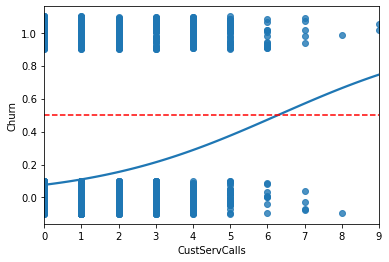

In [88]:
sns.regplot(x=Telecom['CustServCalls'],y=Telecom['Churn'],y_jitter=0.1,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

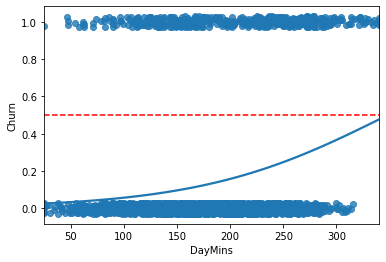

In [89]:
sns.regplot(x=Telecom['DayMins'],y=Telecom['Churn'],y_jitter=0.03,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

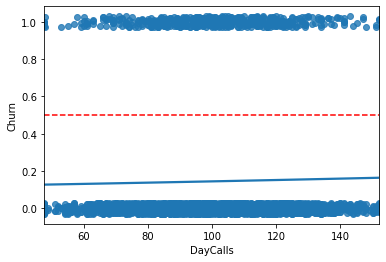

In [90]:
sns.regplot(x=Telecom['DayCalls'],y=Telecom['Churn'],y_jitter=0.03,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

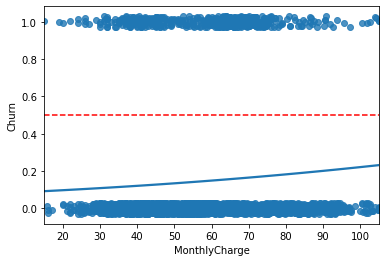

In [91]:
sns.regplot(x=Telecom['MonthlyCharge'],y=Telecom['Churn'],y_jitter=0.03,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

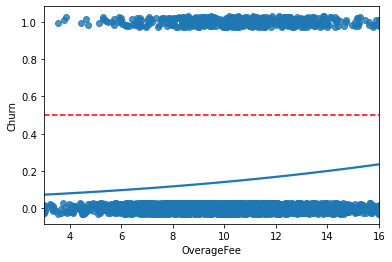

In [94]:
sns.regplot(x=Telecom['OverageFee'],y=Telecom['Churn'],y_jitter=0.03,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

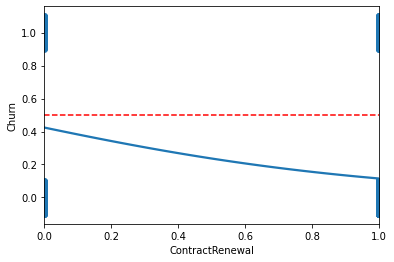

In [52]:
sns.regplot(x=Telecom['ContractRenewal'].astype(int),y=Telecom['Churn'],y_jitter=0.1,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

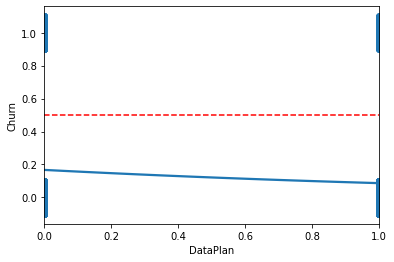

In [51]:
sns.regplot(x=Telecom['DataPlan'].astype(int),y=Telecom['Churn'],y_jitter=0.1,data=Telecom,logistic=True,ci=None)
plt.axhline(y=0.5,ls='--',c="red")

In [72]:
logiclass = LogisticRegression(solver="liblinear",random_state=42)

In [73]:
logimodel = logiclass.fit(X_Train,Y_Train)

In [74]:
lypredtest = logimodel.predict(x_test)
lyprobtest = logimodel.predict_proba(x_test)[:,1]

In [75]:
print(metrics.confusion_matrix(y_test,lypredtest))
print(metrics.classification_report(y_test,lypredtest))
metrics.accuracy_score(y_test,lypredtest)

[[833  24]
 [118  25]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.51      0.17      0.26       143

    accuracy                           0.86      1000
   macro avg       0.69      0.57      0.59      1000
weighted avg       0.82      0.86      0.83      1000



0.858

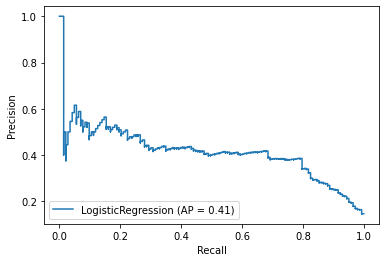

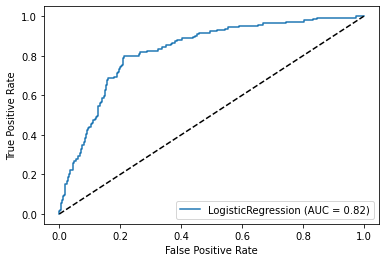

In [76]:
metrics.plot_precision_recall_curve(logimodel,x_test,y_test)
metrics.plot_roc_curve(logimodel,x_test,y_test)
plt.plot([0,1],[0,1],'k--')

In [80]:
lypredtrain = logimodel.predict(X_Train)
lyprobtrain = logimodel.predict_proba(X_Train)[:,1]

In [81]:
print(metrics.confusion_matrix(Y_Train,lypredtrain))
print(metrics.classification_report(Y_Train,lypredtrain))
print(metrics.accuracy_score(Y_Train,lypredtrain))

[[1946   47]
 [ 283   57]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1993
           1       0.55      0.17      0.26       340

    accuracy                           0.86      2333
   macro avg       0.71      0.57      0.59      2333
weighted avg       0.83      0.86      0.82      2333

0.8585512216030862


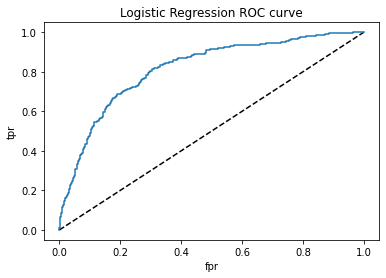

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(Y_Train, lyprobtrain)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

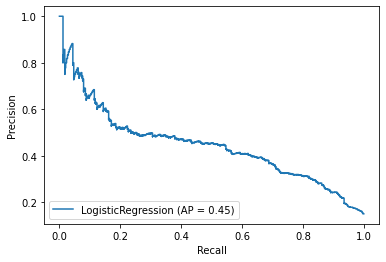

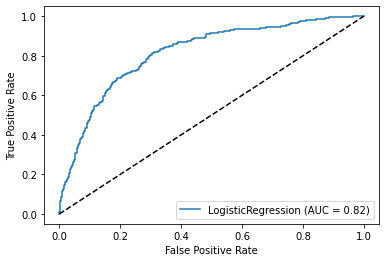

In [83]:
metrics.plot_precision_recall_curve(logimodel,X_Train,Y_Train)
metrics.plot_roc_curve(logimodel,X_Train,Y_Train)
plt.plot([0,1],[0,1],'k--')

<font color=Magenta, size = "3"> K - Nearest Neighbour </font>

Note : Knn requires min max or other normalization and scaling

In [13]:
mscaler = MinMaxScaler()
Telecom_scaled = Telecom

In [14]:
Telecom_scaled[['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins','CustServCalls']] = mscaler.fit_transform(Telecom_scaled[['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins','CustServCalls']])
Telecom_scaled

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0.654639,1,1,0.658537,0.111111,0.762222,0.597470,0.822222,0.528462,0.540541
1,0,0.546392,1,1,0.902439,0.111111,0.433651,0.722062,0.744444,0.521538,0.740541
2,0,0.701031,1,0,0.000000,0.000000,0.693333,0.635806,0.411111,0.235385,0.659459
3,0,0.427835,0,0,0.000000,0.222222,0.871111,0.223692,0.466667,0.007692,0.356757
4,0,0.381443,0,0,0.000000,0.333333,0.449841,0.626222,0.288889,0.340000,0.545946
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0.984536,1,1,0.651220,0.222222,0.416508,0.281196,0.630000,0.598462,0.535135
3329,0,0.345361,1,0,0.082927,0.333333,0.654286,0.089515,0.460000,0.359231,0.518919
3330,0,0.139175,1,0,0.000000,0.222222,0.494603,0.587886,0.455556,0.880000,0.762162
3331,0,0.943299,0,0,0.000000,0.222222,0.599365,0.549550,0.388889,0.383077,0.270270


Split to training and testing set

In [15]:
X = Telecom_scaled.drop('Churn',axis=1)
Y = Telecom_scaled['Churn']
kX_Train , kx_test , kY_Train , ky_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

Determining Optimal K value for knn

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(kX_Train, kY_Train)
    pred_i = knn.predict(kx_test)
    error.append(np.mean(pred_i != ky_test))

Text(0, 0.5, 'Mean Error')

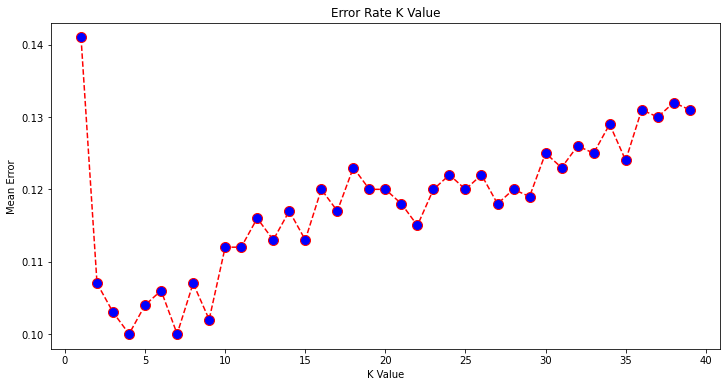

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Got optimal K value to be 7

In [30]:
kmidel = KNeighborsClassifier(n_neighbors=7,metric='euclidean')

In [31]:
finalknn = kmidel.fit(kX_Train,kY_Train)

In [62]:
ky_predtest = kmidel.predict(kx_test)
ky_probtest = kmidel.predict_proba(kx_test)[:,1]

In [33]:
print(metrics.confusion_matrix(ky_test,ky_predtest))
print(metrics.classification_report(ky_test,ky_predtest))

[[847  10]
 [ 90  53]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.84      0.37      0.51       143

    accuracy                           0.90      1000
   macro avg       0.87      0.68      0.73      1000
weighted avg       0.89      0.90      0.88      1000



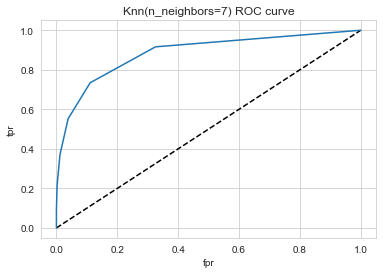

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(ky_test, ky_probtest)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

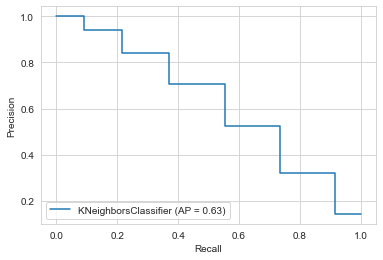

In [65]:
metrics.plot_precision_recall_curve(kmidel,kx_test,ky_test)

In [73]:
ky_predtrain = kmidel.predict(kX_Train)
ky_probtrain = kmidel.predict_proba(kX_Train)[:,1]

In [75]:
print(metrics.confusion_matrix(kY_Train,ky_predtrain))
print(metrics.classification_report(kY_Train,ky_predtrain))
metrics.accuracy_score(kY_Train,ky_predtrain)

[[1970   23]
 [ 171  169]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1993
           1       0.88      0.50      0.64       340

    accuracy                           0.92      2333
   macro avg       0.90      0.74      0.79      2333
weighted avg       0.91      0.92      0.91      2333



0.916845263609087

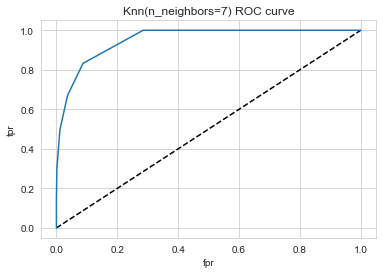

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(kY_Train, ky_probtrain)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

<font color=Magenta, size = "3"> K - Nearest Neighbour with Cross Validation </font>

In [66]:
k_list = list(range(1,40))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, kX_Train, kY_Train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

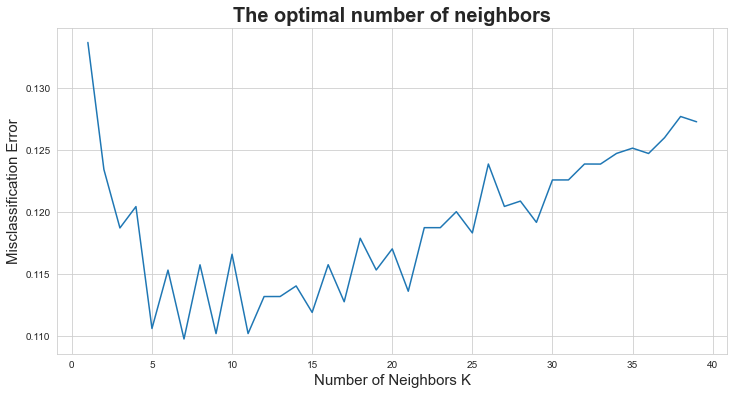

In [43]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(12,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [44]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


<font color=Magenta, size = "3"> Naive Bayes </font>

In [20]:
stat, p = shapiro(Telecom)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.724, p=0.000
Sample does not look Gaussian (reject H0)


In [27]:
NBclob = GaussianNB()

In [28]:
NBModel = NBclob.fit(X_Train,Y_Train)

In [50]:
importnce = permutation_importance(NBModel, x_test, y_test)
print(importnce.importances_mean)

[-0.0004  0.0434  0.0034  0.0104  0.0046 -0.0008 -0.001  -0.0012]


In [35]:
NBy_predtest = NBModel.predict(x_test)
NBy_probtest = NBModel.predict_proba(x_test)[:,1]

In [37]:
print(metrics.confusion_matrix(y_test,NBy_predtest))
print(metrics.classification_report(y_test,NBy_predtest))
print(metrics.accuracy_score(y_test,NBy_predtest))

[[784  73]
 [ 92  51]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       857
           1       0.41      0.36      0.38       143

    accuracy                           0.83      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.83      0.83      0.83      1000

0.835


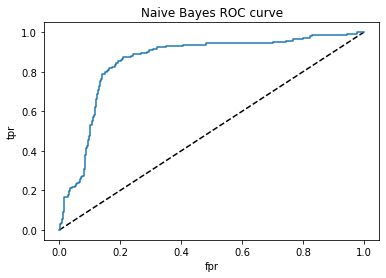

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, NBy_probtest)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

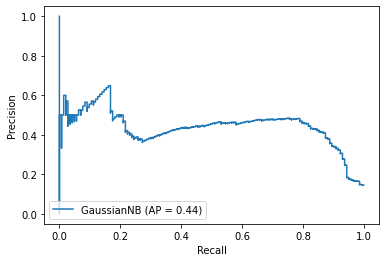

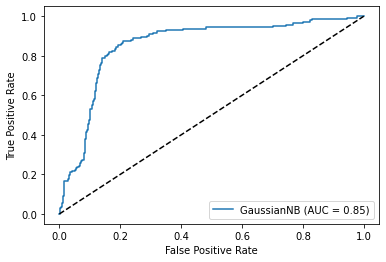

In [42]:
metrics.plot_precision_recall_curve(NBModel,x_test,y_test)
metrics.plot_roc_curve(NBModel,x_test,y_test)
plt.plot([0,1],[0,1],'k--')

In [43]:
NBy_predtrain = NBModel.predict(X_Train)
NBy_probtrain = NBModel.predict_proba(X_Train)[:,1]

In [44]:
print(metrics.confusion_matrix(Y_Train,NBy_predtrain))
print(metrics.classification_report(Y_Train,NBy_predtrain))
print(metrics.accuracy_score(Y_Train,NBy_predtrain))

[[1845  148]
 [ 193  147]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1993
           1       0.50      0.43      0.46       340

    accuracy                           0.85      2333
   macro avg       0.70      0.68      0.69      2333
weighted avg       0.85      0.85      0.85      2333

0.853836262323189


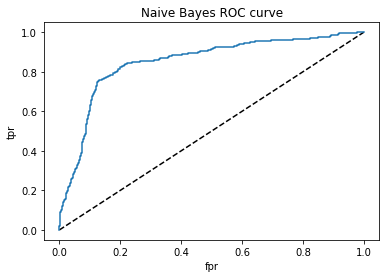

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(Y_Train, NBy_probtrain)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

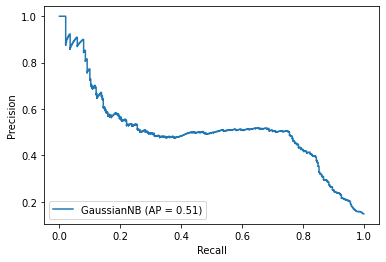

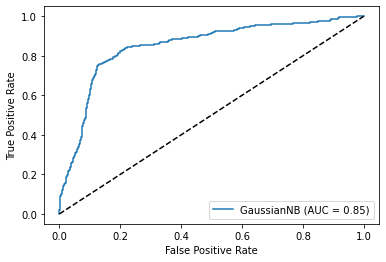

In [46]:
metrics.plot_precision_recall_curve(NBModel,X_Train,Y_Train)
metrics.plot_roc_curve(NBModel,X_Train,Y_Train)
plt.plot([0,1],[0,1],'k--')

<font color=Magenta, size = "3"> Naive Bayes with Cross Validation </font>

In [53]:
k_fold = KFold(len(Y_Train), n_splits=10, shuffle=True, random_state=42)

In [59]:
NBscores = cross_val_score(NBModel,X_Train,Y_Train, cv=k_fold, scoring='accuracy')
NBscores.mean()

0.8529789969995714

In [60]:
k_fold1 = KFold(len(y_test), n_splits=10, shuffle=True, random_state=42)
NBscores1 = cross_val_score(NBModel,x_test,y_test, cv=k_fold1, scoring='accuracy')
NBscores1.mean()

0.838